<a href="https://colab.research.google.com/github/AhmadAlabrash/NLP/blob/main/NLP_TF_IDF_Vectorizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import sklearn

In [89]:
corpus = [
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes"
]

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

v =TfidfVectorizer()
v.fit_transform(corpus)

v.idf_[25]

2.386294361119891

In [91]:
words = v.get_feature_names_out()

for word in words :
  id = v.vocabulary_.get(word)

  idf = v.idf_[id]

  print(id , '|' , word , '|' , idf)

0 | already | 2.386294361119891
1 | am | 2.386294361119891
2 | amazon | 2.386294361119891
3 | and | 2.386294361119891
4 | announcing | 1.2876820724517808
5 | apple | 2.386294361119891
6 | are | 2.386294361119891
7 | ate | 2.386294361119891
8 | biryani | 2.386294361119891
9 | dot | 2.386294361119891
10 | eating | 1.9808292530117262
11 | eco | 2.386294361119891
12 | google | 2.386294361119891
13 | grapes | 2.386294361119891
14 | iphone | 2.386294361119891
15 | ironman | 2.386294361119891
16 | is | 1.1335313926245225
17 | loki | 2.386294361119891
18 | microsoft | 2.386294361119891
19 | model | 2.386294361119891
20 | new | 1.2876820724517808
21 | pixel | 2.386294361119891
22 | pizza | 2.386294361119891
23 | surface | 2.386294361119891
24 | tesla | 2.386294361119891
25 | thor | 2.386294361119891
26 | tomorrow | 1.2876820724517808
27 | you | 2.386294361119891


In [92]:
import pandas as pd

df = pd.read_csv("/content/ecommerceDataset.csv",names=['category','contents'])

df

,category,contents
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...
...,...,...
50420,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...
50421,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...
50422,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...
50423,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou..."


In [93]:
df.category.value_counts()

Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: category, dtype: int64

In [94]:
df['cate_num'] = df.category.map({
    'Household':0 ,
    'Books':1,
    'Electronics':2,
    'Clothing & Accessories':3
})

In [95]:
df = df.dropna()

In [96]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    df.contents, 
    df.cate_num, 
    test_size=0.2,)

In [97]:
import seaborn as sns 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline

In [98]:
x_train

22723    Review of PGI Chandigarh Post Graduate Medical...
23685    Sapiens: A Brief History of Humankind Review "...
6765     HOKIPO Wooden Dinner Table Kitchen Placemats S...
28795    Foundations of Periodontics for the Dental Hyg...
18429    Glare Laser Glare Fruit & Vegetable Knives Mul...
                               ...                        
27967                             Teach Yourself to Think 
29825    Anatomy & Drawing The purpose of this book is ...
37649    Bold N Elegant Women's Black Comfortable Mater...
36475    Fully Pashmina Stoles For Girls And Women For ...
33656    Aveeno Baby Wash & Shampoo 18 Ounce Size:18oz ...
Name: contents, Length: 40339, dtype: object

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3923
           1       0.96      0.96      0.96      2384
           2       0.95      0.94      0.94      2076
           3       0.96      0.97      0.97      1702

    accuracy                           0.96     10085
   macro avg       0.96      0.96      0.96     10085
weighted avg       0.96      0.96      0.96     10085



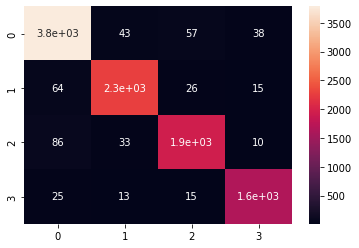

In [99]:
clf = Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('kneighbors',KNeighborsClassifier())
])
clf.fit(x_train,y_train)

y_pr = clf.predict(x_test)

cm  = confusion_matrix(y_test,y_pr)

report = classification_report(y_test,y_pr)

print(report)

sns.heatmap(cm , annot=True)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3923
           1       0.97      0.92      0.95      2384
           2       0.96      0.89      0.93      2076
           3       0.98      0.93      0.95      1702

    accuracy                           0.94     10085
   macro avg       0.95      0.93      0.94     10085
weighted avg       0.94      0.94      0.94     10085



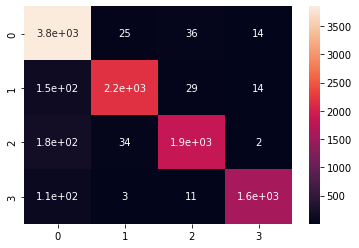

In [100]:
from sklearn.naive_bayes import MultinomialNB

clf = Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('kneighbors',MultinomialNB())
])
clf.fit(x_train,y_train)

y_pr = clf.predict(x_test)

cm  = confusion_matrix(y_test,y_pr)

report = classification_report(y_test,y_pr)

print(report)

sns.heatmap(cm , annot=True)